<a href="https://colab.research.google.com/github/lucianosilva-github/logicanddiscretemathematics/blob/main/LOGIC%2BDISCRETEMATH_CLASS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">

#**CLASS 05 - LINEAR TEMPORAL LOGIC (LTL) - PART III**
**Learning Objectives:**
*   Reviewing of LTL Operators (unary + binary operators)
*   Kripke Structures
*   Model Checking in PL (Propositional Logic) and LTL
*  Implementation of Model Checking with PL and LTL
</div>


## **LTL OPERATORS REVIEW**

A PL (Propositional Logic) formula is either:

* ⊤ (**true**) or ⊥ (**false**)
* a propositional variable
* ¬𝜑1, 𝜑1∧𝜑2, 𝜑1∨𝜑2, or 𝜑1→𝜑2 where both 𝜑1 and 𝜑2 are PL formulas

LTL (Linear Temporal Logic) formulas have the form 𝐴𝜌 where 𝜌 is a LTL path formula and a LTL path formula is either:

* ⊤ or ⊥
*  propositional variable
*  ¬𝜑1, 𝜑1∧𝜑2, 𝜑1∨𝜑2, or 𝜑1→𝜑2, where both 𝜑1 and 𝜑2 are LTL path formulas
* 𝐗𝜑1, 𝐅𝜑1, 𝐆𝜑1, 𝜑1𝐔𝜑2, or 𝜑1𝐑𝜑2 where both 𝜑1 and 𝜑2 are LTL path formulas.


**KRIPKE STRUCTURES**

A Kripke structure is a **directed graph**, equipped with a set of initial nodes, such that **every node** is source of some edge and it **is labeled by a set of atomic propositions**. The nodes of Kripke structure are called states:

A Kripke structure is a tuple (𝑆,𝑆0,𝑅,𝐿) such that:

* 𝑆 is a finite set of states
* 𝑆0⊆𝑆 is a set of initial states
* 𝑅⊆𝑆×𝑆 is a set of transitions such that for all 𝑠∈𝑆 there exists a (𝑠,𝑠′)∈𝑅 for some 𝑠′∈𝑆
* 𝐿:𝑆→2^{AP} maps each state into a set of atomic propositions. Sometimes, the set of initial states is omitted. In such cases, 𝑆 and 𝑆0 coincide.

A computation of a Kripke structure (𝑆,𝑆0,𝑅,𝐿) is an infinite path of (𝑆,𝑅) that starts from some 𝑠∈𝑆0. In the following code we are specifying a Kripke structure using the Python module pyModelChecking.

In [1]:
!pip install pyModelChecking

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 KB 719.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 KB 4.0 MB/s eta 0:00:00


In [2]:
from pyModelChecking import Kripke

K=Kripke(R=[(0,0),(0,1),(1,2),(2,2),(3,3)], L={0: set(['p']), 1:set(['p','q']),3:set(['p'])})

**EXERCISE 1**

Interpret the Kripke Structure K:

Type your interpretation here





In [ ]:
from flloat.parser.ltlf import LTLfParser

# parse the formula
parser = LTLfParser()
formula = "F (X(fi|psi)->X(fi)|X(psi))"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
graph = dfa.to_graphviz()
graph

In [ ]:
from pickle import TRUE
test = [{"fi": False, "psi": False},
        {"fi": False, "psi": True},
        {"fi": True, "psi": False},
        {"fi": True, "psi": True}]
assert dfa.accepts(test)

## **BINARY LTL OPERATORS REVIEW**

In LTL we have four binary operators:

<table>
  <tr>
    <th>Operator</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td>ψUφ</td>
    <td>Until: ψ has to hold at least until φ becomes true, which must hold at the current or a future position.
  </tr>
  
  <tr>
    <td>ψWφ</td>
    <td>Weak until: ψ has to hold at least until φ; if φ never becomes true, ψ must remain true forever.
  </tr>

  <tr>
    <td>ψMφ</td>
    <td>Strong release: φ has to be true until and including the point where ψ first becomes true, which must hold at the current or a future position.
  </tr>

<tr>
    <td>ψRφ</td>
    <td>Release: φ has to be true until and including the point where ψ first becomes true; if ψ never becomes true, φ must remain true forever.
  </tr>

  
</table>

In the next figure, one can view a graphical comparison among these operators:

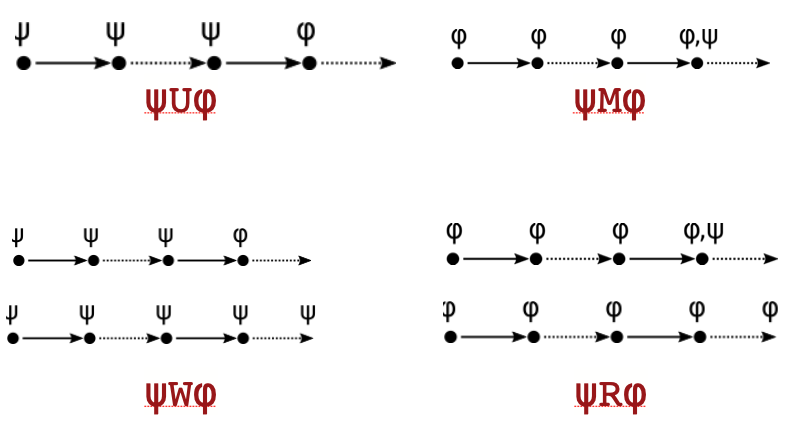

There are several results about these operators:

* ρ U (φ ∨ ψ) ≡ (ρ U φ) ∨ (ρ U ψ)
* (φ ∧ ψ) U ρ ≡ (φ U ρ) ∧ (ψ U ρ)
* ¬ (φ U ψ) ≡ (¬φ R ¬ψ)
* ¬ (φ R ψ) ≡ (¬φ U ¬ψ)	
* ¬ (φ M ψ) ≡ (¬φ W ¬ψ)
* φ U ψ ≡ ψ ∨ ( φ ∧ X(φ U ψ) )
* φ W ψ ≡ ψ ∨ ( φ ∧ X(φ W ψ) )
* φ U ψ ≡ φ U (φ U ψ)
* X (φ U ψ)≡ (X φ) U (X ψ)

### **EXERCISE 1** 

Using the module FLLOAT, prove the following identities and test them:

* ρ U (φ ∨ ψ) ≡ (ρ U φ) ∨ (ρ U ψ)

* (φ ∧ ψ) U ρ ≡ (φ U ρ) ∧ (ψ U ρ)

*  ¬ (φ U ψ) ≡ (¬φ R ¬ψ)

* ¬ (φ R ψ) ≡ (¬φ U ¬ψ)

* ¬ (φ M ψ) ≡ (¬φ W ¬ψ)

In [ ]:
#TYPE YOUR SOLUTIONS HERE

### **HOMEWORK** 

Using the module FLLOAT, interpret and prove the following identities and test them:

* φ U ψ ≡ ψ ∨ ( φ ∧ X(φ U ψ) )

* φ W ψ ≡ ψ ∨ ( φ ∧ X(φ W ψ) )

* φ U ψ ≡ φ U (φ U ψ)

* X (φ U ψ)≡ (X φ) U (X ψ)

In [ ]:
#TYPE YOUR IMPLEMENTATION HERE